<a href="https://www.kaggle.com/code/kusumakar/car-price-eda-and-prediction?scriptVersionId=200132021" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price-prediction/car_price_prediction_.csv


In [2]:
df=pd.read_csv("/kaggle/input/car-price-prediction/car_price_prediction_.csv")

In [3]:
df.head()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


In [4]:
df.isnull().sum()

Car ID          0
Brand           0
Year            0
Engine Size     0
Fuel Type       0
Transmission    0
Mileage         0
Condition       0
Price           0
Model           0
dtype: int64

In [5]:
df.dtypes

Car ID            int64
Brand            object
Year              int64
Engine Size     float64
Fuel Type        object
Transmission     object
Mileage           int64
Condition        object
Price           float64
Model            object
dtype: object

In [6]:
categorical = df.select_dtypes(include='object').columns
numerical  = df.select_dtypes(include=['int64','float64']).columns

In [7]:
categorical

Index(['Brand', 'Fuel Type', 'Transmission', 'Condition', 'Model'], dtype='object')

## Distribution of Car Brands

([<matplotlib.patches.Wedge at 0x7f4dd16af340>,
 [Text(0.9807339552654288, 0.49815751423563603, 'Toyota'),
  Text(0.1843541800214691, 1.0844415780984293, 'Audi'),
  Text(-0.7449026706919715, 0.8093948425805346, 'BMW'),
  Text(-1.0975612141597935, -0.07320779447627304, 'Mercedes'),
  Text(-0.6375847993276309, -0.8963735960336766, 'Honda'),
  Text(0.28425588360761883, -1.0626375640990922, 'Tesla'),
  Text(0.9970683529070058, -0.46460165693991085, 'Ford')],
 [Text(0.5349457937811429, 0.27172228049216507, '15.0%'),
  Text(0.10055682546625587, 0.5915135880536887, '14.7%'),
  Text(-0.4063105476501662, 0.44148809595301886, '14.3%'),
  Text(-0.5986697531780691, -0.039931524259785287, '14.1%'),
  Text(-0.34777352690598046, -0.48893105238200535, '14.1%'),
  Text(0.15504866378597387, -0.5796204895085956, '13.9%'),
  Text(0.5438554652220031, -0.2534190856035877, '13.9%')])

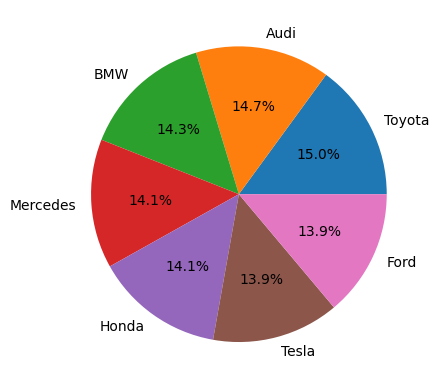

In [8]:
brand_counts=df['Brand'].value_counts().reset_index()
plt.pie(data=brand_counts,x='count',labels='Brand',autopct='%1.1f%%')

### We do not see any imbalance in the classes for Models. Cars belonging to variant models have almost equal distribution

## Brand Vs Mean Price

<Axes: xlabel='Brand', ylabel='Price'>

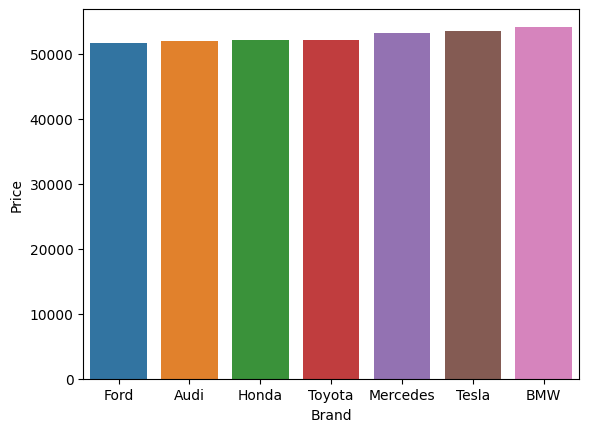

In [9]:
brand_avg=df.groupby('Brand').agg({"Price":'mean'}).reset_index().sort_values(by='Price')
sns.barplot(x='Brand',y='Price',data=brand_avg)


* #### The above graph depicts the Mean Price of different Models ( in Ascending Order) . BMW is the most expensive one where as Ford being the least.

## Analysis of Fuel Type and its impact on the Price 

([<matplotlib.patches.Wedge at 0x7f4dd1789330>,
 [Text(0.8159440696253353, 0.8799064014105399, 'Diesel'),
  Text(-0.8386867466521296, 0.7117615759438457, 'Petrol'),
  Text(-0.7180648231061358, -0.8332964117392767, 'Electric'),
  Text(0.8009186039629926, -0.7540088791426605, 'Hybrid')],
 [Text(0.47596737394811217, 0.5132787341561482, '26.2%'),
  Text(-0.4574654981738888, 0.38823358687846127, '25.2%'),
  Text(-0.39167172169425585, -0.45452531549415087, '24.6%'),
  Text(0.43686469307072323, -0.41127757044145113, '24.0%')])

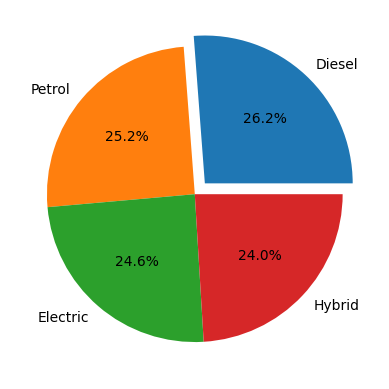

In [10]:
fuel_counts=df['Fuel Type'].value_counts().reset_index()
explode = (0.1, 0, 0, 0)
plt.pie(data=fuel_counts,x='count',labels='Fuel Type',autopct='%1.1f%%',explode=explode)

## Impact of Fuel Type on the Price of Car

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, "Impact of 'FUEL TYPE' on Car Price")

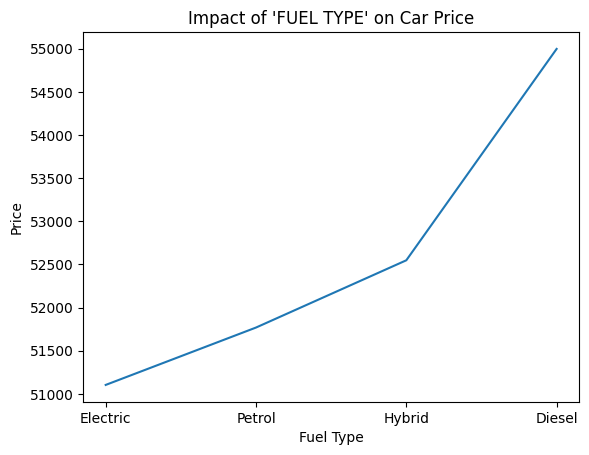

In [11]:
fuel_price = df.groupby('Fuel Type').agg({"Price":"mean"}).reset_index().sort_values(by='Price')
sns.lineplot(x='Fuel Type',y='Price',data=fuel_price)
plt.title("Impact of 'FUEL TYPE' on Car Price")

* ###  Cars that run on Diesel are expensive than others. Electronically Charged cars are the least expensive

## Analysis of Transmission Column and its impact on Price

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, "Impact of 'Transmission' on Car Price")

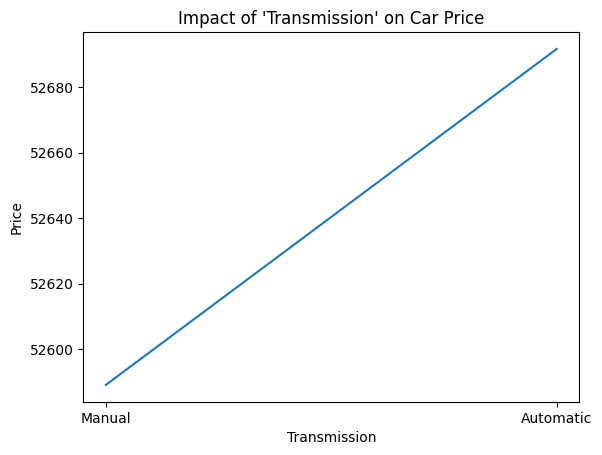

In [12]:
transmission_price = df.groupby('Transmission').agg({"Price":"mean"}).reset_index().sort_values(by='Price')
sns.lineplot(x='Transmission',y='Price',data=transmission_price)
plt.title("Impact of 'Transmission' on Car Price")

* ### Automatic Cars are more expensive than Manual Cars 

### Does "Condition" of Car impacts the Price?

([<matplotlib.patches.Wedge at 0x7f4dcf13ee60>,
 [Text(0.5286243826772201, 0.9760411169818248, 'Used'),
  Text(-1.1081460070663662, -0.06412820770042695, 'Like New'),
  Text(0.5841304201582447, -0.9438705696470003, 'New')],
 [Text(0.290505291381175, 0.536382956179201, '34.2%'),
  Text(-0.6089811390184535, -0.03524162765518958, '33.4%'),
  Text(0.3210086092761524, -0.5187036463825857, '32.4%')])

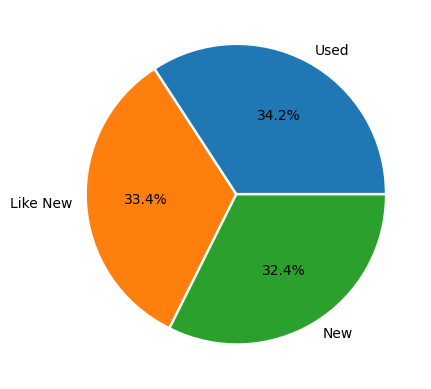

In [13]:
condition_counts=df['Condition'].value_counts().reset_index()
explode=[0.01]*len(condition_counts)
plt.pie(data=condition_counts,x='count',labels='Condition',autopct='%1.1f%%',explode=explode)

## Distribution of Cars based on Condition is almost equal. Let's check out its impact on Price

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, "Impact of 'Condition' on Car Price")

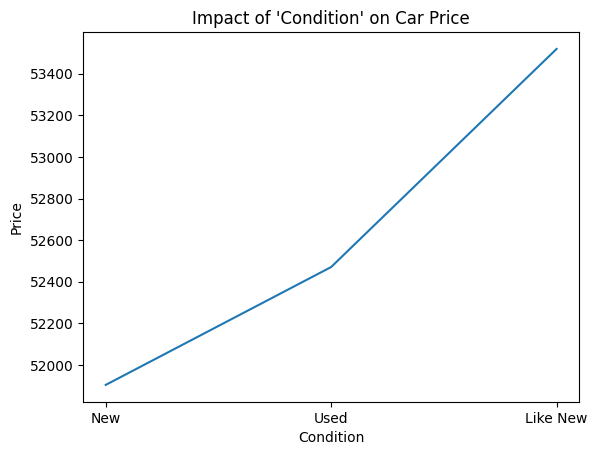

In [14]:
condition_price = df.groupby('Condition').agg({"Price":"mean"}).reset_index().sort_values(by='Price')
sns.lineplot(x='Condition',y='Price',data=condition_price)
plt.title("Impact of 'Condition' on Car Price")

### Price of "New Cars" seems to be the least compared to "Used" and "Like New" Cars

## Checking the outlier values

<Axes: xlabel='Model', ylabel='Price'>

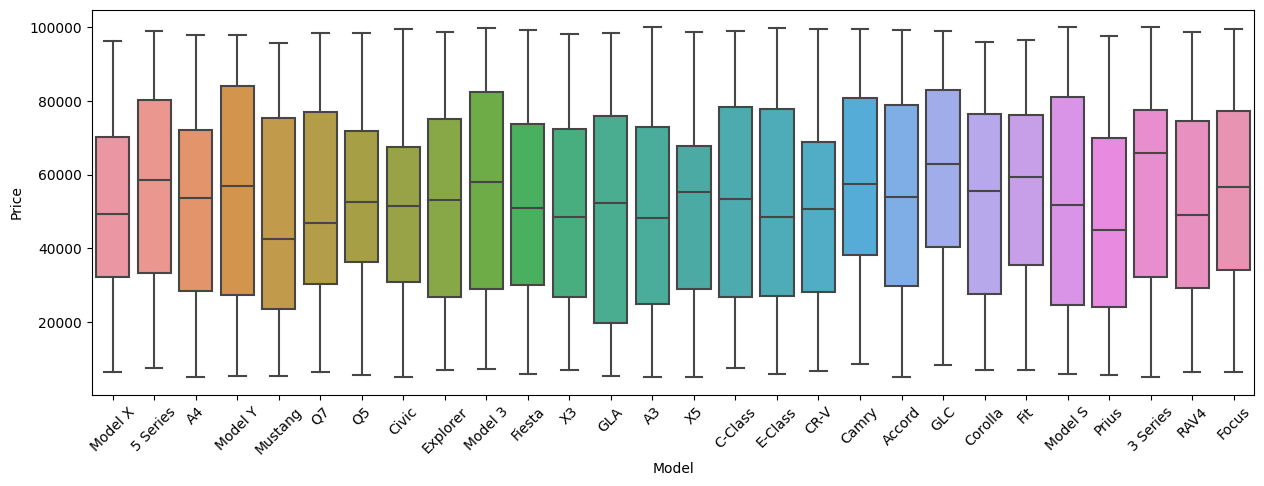

In [15]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)

sns.boxplot(x='Model',y='Price',data=df)

* ### Prices are in range, and do not contain any aberrant value

## Let's check how Time has impacted the price of the cars

In [16]:
year_df = df.groupby(["Year"]).agg({"Price":"mean"}).reset_index()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Year', ylabel='Price'>

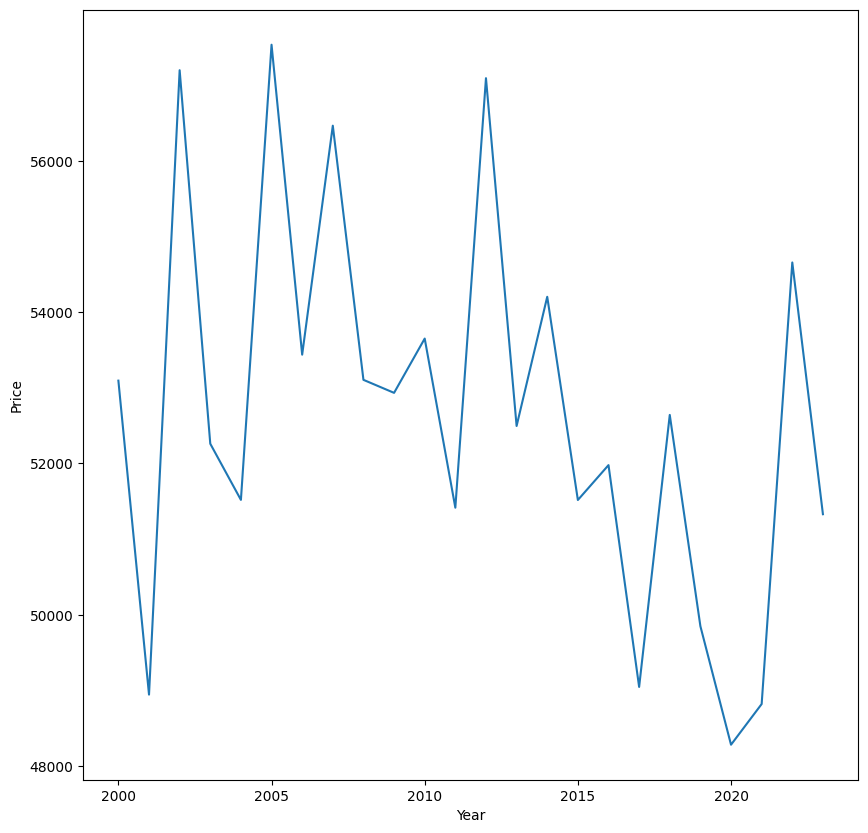

In [17]:
plt.figure(figsize=(10,10))
sns.lineplot(x='Year',y='Price',data=year_df)


* ## Overall, Price has decreased over the span of years

## Relation of Engine Size with Price

<Axes: xlabel='Engine Size', ylabel='Price'>

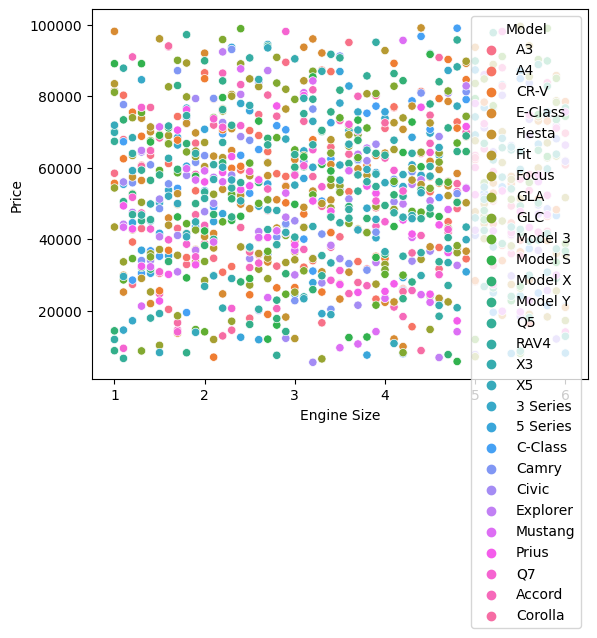

In [18]:
size_df = df.groupby(["Engine Size",'Model']).agg({"Price":"mean"}).reset_index()
sns.scatterplot(x='Engine Size',y='Price',data=size_df,hue='Model')

In [19]:
numerical

Index(['Car ID', 'Year', 'Engine Size', 'Mileage', 'Price'], dtype='object')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

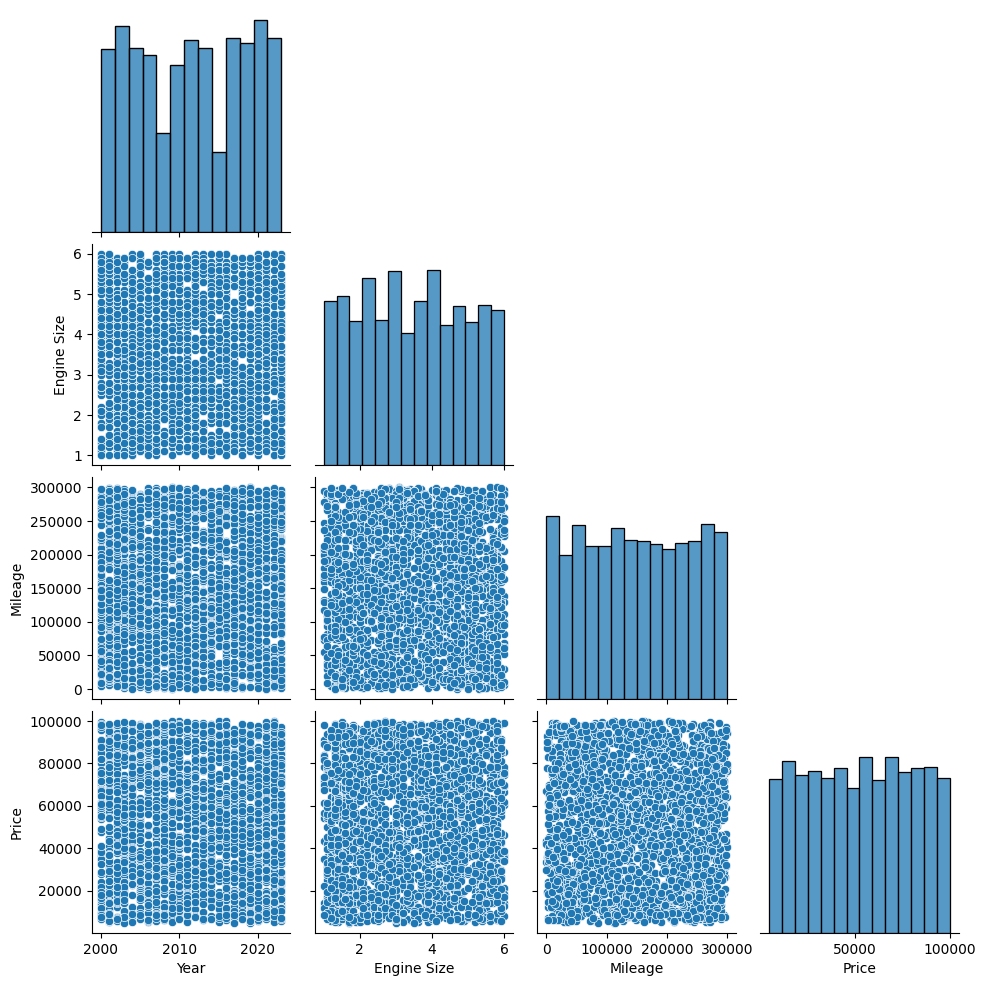

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df[numerical].drop(columns=['Car ID'],axis=1),corner=True)

### Feature Selection and Model Training

In [21]:
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split



## SPLIT THE DATA TO TRAIN AND TEST AND SCALE / ENCODE THE DATA

In [22]:
from sklearn.compose import ColumnTransformer

X_train,X_test,Y_train,Y_test=train_test_split(df.drop(columns=['Price','Car ID'],axis=1),df['Price'],test_size=0.25)

## NUMERICAL COLUMNS
transformer = ColumnTransformer(
[("scaler",StandardScaler(),['Engine Size','Mileage']),
 
 
## CATEGORICAL COLUMNS 
("encoder",OrdinalEncoder(),['Brand', 'Fuel Type', 'Transmission', 'Condition', 'Model'])],remainder='passthrough')
X_train_transformed=transformer.fit_transform(X_train)



## For Feature Selection, We will use Embedded Method ( Lasso) to select Important Features. Lasso regularizes the coefficients to 0 of those features which are irrelevant for the Model and have very low variance towards the target variable

In [23]:
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel


In [24]:
sel_ = SelectFromModel(Lasso(alpha=100, random_state=10))
sel_.fit(X_train_transformed, Y_train)

SelectFromModel(estimator=Lasso(alpha=100, random_state=10))

In [25]:
sel_.get_support()


array([ True,  True,  True,  True,  True, False,  True,  True])

In [26]:
selected_feat = X_train.columns[(sel_.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 8
selected features: 7
features with coefficients shrank to zero: 1


## Relevant Features as suggested by Lasso Regularization

In [27]:
selected_feat

Index(['Brand', 'Year', 'Engine Size', 'Fuel Type', 'Transmission',
       'Condition', 'Model'],
      dtype='object')

In [28]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()


In [29]:
X_train,X_test,Y_train,Y_test=train_test_split(df.drop(columns=['Price','Car ID','Transmission','Condition'],axis=1),df['Price'],test_size=0.25)

transformer = ColumnTransformer(
[("scaler",StandardScaler(),['Engine Size','Mileage']),
 
("encoder",OneHotEncoder(),['Brand', 'Fuel Type',  'Model'])],remainder='passthrough')
X_train_transformed=transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

In [30]:
rf.fit(X_train_transformed,Y_train)


RandomForestRegressor()

In [31]:
y_pred = rf.predict(X_test_transformed)

In [32]:
import numpy as np
from sklearn.metrics import mean_squared_error
mse_rf = mean_squared_error(Y_test, y_pred)


In [33]:
np.sqrt(  mse_rf)

26663.942296020028